In [2]:
import pandas as pd
import os
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import glob
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy.stats import linregress
import torch.nn as nn
import tensorboard

In [3]:
print(os.getcwd())

/Users/emilydennis/Desktop/GitHub/python_code


In [8]:
def save_stats_h5(fname):
    '''Function to extract test loss and training loss values from h5 files saved in training.
    '''

    with h5py.File(fname) as f:
        print('keys of file:\n {}'.format(list(f.keys())))
        print('base lr value: {}'.format(f['base_lr'][()]))
        test = list(f['test'].keys())
        print('contents of test dict: \n {}'.format(test))
        train = list(f['train'].keys())
        print('contents of train dict: \n {}'.format(train))
        test_loss_arr = f['test'][test[2]][()] 
        train_loss_arr = f['train'][train[2]][()]
        
    return test_loss_arr, train_loss_arr

    


In [9]:
f=h5py.File('/Users/emilydennis/Desktop/stats99000.h5')

In [10]:
print('keys of file:\n {}'.format(list(f.keys())))

keys of file:
 ['base_lr', 'elapsed', 'test', 'train']


In [11]:
test=list(f['test'])
test_loss_arr = f['test'][test[2]][()] 
test_iter = f['test'][test[0]][()]
len(test_iter)

991

In [12]:
train=list(f['train'])
train_loss_arr = f['train'][train[2]][()] 
train_iter = f['train'][train[0]][()]
len(train_iter)

2029

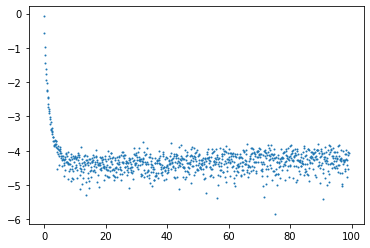

In [35]:
plt.scatter(test_iter/1000,np.log(test_loss_arr),s=1)

In [15]:
test, train = save_stats_h5('/Users/emilydennis/Desktop/stats99000.h5')

keys of file:
 ['base_lr', 'elapsed', 'test', 'train']
base lr value: 0
contents of test dict: 
 ['iter', 'iter_time', 'soma_label']
contents of train dict: 
 ['iter', 'iter_time', 'soma_label']


In [18]:
len(test)

991

In [20]:
end_iter = 99000

In [21]:
start_iter = 2000

In [214]:
dst="/Users/emilydennis/Desktop/"

In [100]:
iters = np.take(test_iter, np.arange(20, len(test_iter)))

In [101]:
loss=np.take(test_loss_arr, np.arange(20,len(test_loss_arr)))

In [92]:
len(loss)

941

In [93]:
len(iters)

941

In [94]:
 #linear regression
fit = np.polyfit(iters, loss, 1)

In [95]:
p=np.poly1d(fit)
p

poly1d([2.27053469e-08, 1.21842587e-02])

In [96]:
linreg_stats = linregress(iters,loss)
linreg_stats

LinregressResult(slope=2.270534690213933e-08, intercept=0.01218425870336011, rvalue=0.18515736575109848, pvalue=1.0538193455332456e-08, stderr=3.9325951034847055e-09)

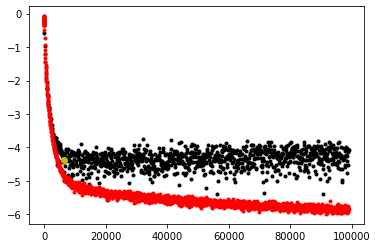

In [216]:
plt.plot(test_iter,np.log(test_loss_arr),'k.')
plt.plot(train_iter,np.log(train_loss_arr),'r.')
plt.plot(6500,np.log(test_loss_arr[65]),'yo')
plt.savefig(os.path.join(dst, "loss_values.pdf"))

In [ ]:
plt.plot(test_iter,np.log(test_loss_arr),'k.')
plt.plot(train_iter,np.log(train_loss_arr),'r.')

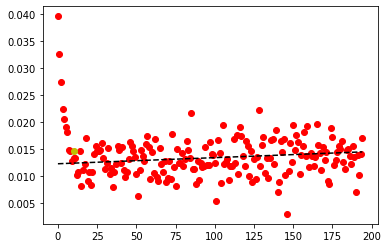

In [212]:
plt.figure()
plt.plot(loss[0:1000:5],'ro',p(iters[0:1000:5]),'--k')
plt.plot(10,loss[40],'yo')

In [210]:
iters[40]

6500

In [211]:
test_iter[65]

6500

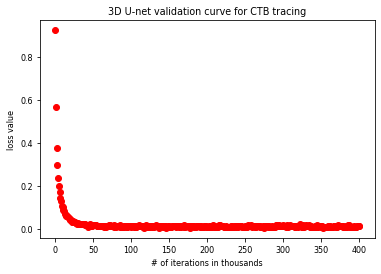

In [133]:

    
    #plot
    plt.rcParams.update({'font.size': 8})
    plt.figure()
    plt.plot(test_loss_arr, 'ro')
    plt.xlabel('# of iterations in thousands')
    plt.ylabel('loss value')
    plt.title('3D U-net validation curve for CTB tracing')          
    plt.show()
    

    



NameError: name 'plot_val_curve' is not defined

In [193]:
train_iter

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    50,   100,   150,   200,   250,
         300,   350,   400,   450,   500,   550,   600,   650,   700,
         750,   800,   850,   900,   950,  1000,  1050,  1100,  1150,
        1200,  1250,  1300,  1350,  1400,  1450,  1500,  1550,  1600,
        1650,  1700,  1750,  1800,  1850,  1900,  1950,  2000,  2050,
        2100,  2150,  2200,  2250,  2300,  2350,  2400,  2450,  2500,
        2550,  2600,  2650,  2700,  2750,  2800,  2850,  2900,  2950,
        3000,  3050,  3100,  3150,  3200,  3250,  3300,  3350,  3400,
        3450,  3500,  3550,  3600,  3650,  3700,  3750,  3800,  3850,
        3900,  3950,

In [197]:
test_loss_arr

array([0.9237861 , 0.56841804, 0.37754025, 0.29749654, 0.23847745,
       0.20097901, 0.17132633, 0.14488399, 0.1307755 , 0.1091423 ,
       0.10403863, 0.08680532, 0.08512312, 0.07123096, 0.06642648,
       0.06110476, 0.05901455, 0.05575073, 0.04931815, 0.04576459,
       0.03963513, 0.04286655, 0.03350606, 0.0341278 , 0.03533351,
       0.03254201, 0.03151043, 0.02975441, 0.02703018, 0.02416357,
       0.02736393, 0.02143667, 0.0241547 , 0.02128537, 0.02526782,
       0.02246368, 0.02158535, 0.02201472, 0.02433088, 0.02406626,
       0.02060174, 0.01755463, 0.01962135, 0.01079675, 0.01652137,
       0.01908344, 0.02128703, 0.01578816, 0.01208719, 0.01859131,
       0.01814049, 0.02043848, 0.0192172 , 0.01697859, 0.01703593,
       0.0148516 , 0.01558272, 0.01186714, 0.01409191, 0.01581101,
       0.01451247, 0.01424381, 0.01571834, 0.01412218, 0.0088266 ,
       0.01265865, 0.01200096, 0.0104165 , 0.0154345 , 0.01434548,
       0.01338627, 0.01733566, 0.01679743, 0.01588626, 0.01324

In [198]:
np.log(0.01)

-4.605170185988091

In [201]:
np.e**-5

0.006737946999085469

In [202]:
np.e**-4

0.018315638888734186

In [203]:
np.e**-3

0.04978706836786395

In [204]:
np.e**-2

0.1353352832366127

In [205]:
np.e**-1

0.36787944117144233